In [1]:
from sklearn.svm import SVR
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()


In [42]:


# stocker et afficher les données 
pathto = '/Users/hamem/Downloads/prediction-action-bourse/'
df = pd.read_csv(pathto+'newest_stock_prices.csv')
prix_actuel =  df.tail(1)
#prix_actuel

# preparer les données pour trainer les modèles SVR (on va avoir trois modèles ici )
# extraire toutes les données sauf la dernière ligne 
df = df.head(len(df)-1)
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000
1,2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000
2,2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000
3,2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000
4,2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000
...,...,...,...,...,...,...,...
764,2021-01-14,3814.979980,3823.600098,3792.860107,3795.540039,3795.540039,5180140000
765,2021-01-15,3788.729980,3788.729980,3749.620117,3768.250000,3768.250000,5353060000
766,2021-01-19,3781.879883,3804.530029,3780.370117,3798.909912,3798.909912,4982940000
767,2021-01-20,3816.219971,3859.750000,3816.219971,3851.850098,3851.850098,4551790000


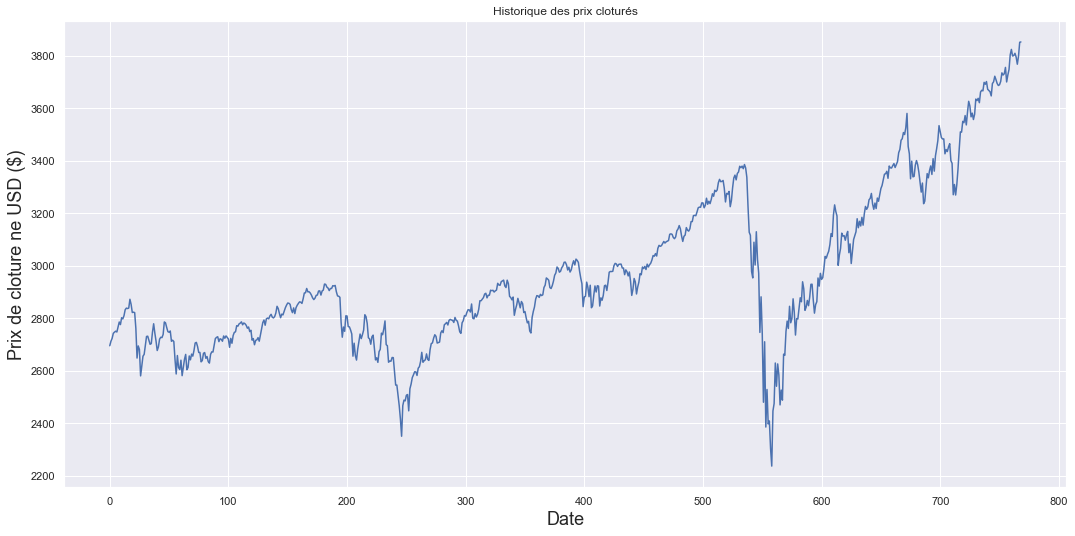

In [19]:

#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Historique des prix cloturés')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Prix de cloture ne USD ($)',fontsize=18)
plt.show()


In [43]:
# une partie du dataset sera trainée et testée
df = df[750:768]
df

,Date,Open,High,Low,Close,Adj Close,Volume
750,2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3772630000
751,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
752,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
753,2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000
754,2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3145200000
755,2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
756,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
757,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
758,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
759,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000


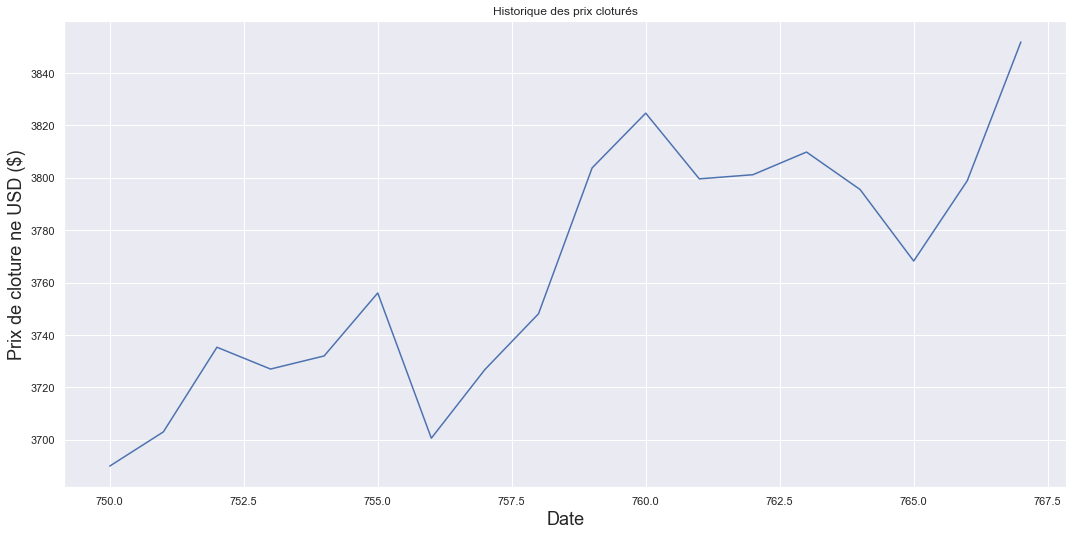

In [44]:

#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Historique des prix cloturés')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Prix de cloture ne USD ($)',fontsize=18)
plt.show()



In [45]:

# création d'une liste vide pour les données dépendantes et indépendantes 
days = list() 
adj_close_prices =  list()

# obtenir les dates et les prix de clôture ajustés (adj_close_prices)
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']



In [46]:

# pour appler cette procedure dans le boucle de créations de days 
# days.append([int(date_to_timestamp(day))])
def date_to_timestamp(d): # non utilisée --> à améliorer plus tard 
    return  pd.to_datetime(d,format='%Y-%m-%d').timestamp()



In [47]:

# création des données indépendantes 
for day in df_days: 
    # pour extraire les jours à partir des dates
    days.append([int(day.split('-')[2])]) 
    
# Création de dataset dépendante
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))


In [48]:

# créer les 3 modèles SVR (SVM regresseur)

# créer et trainer un modèle svr en uilisant un kernel linéaire 
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(days, adj_close_prices)

# créer et trainer un modèle svr en uilisant un kernel polinomial 
pol_svr = SVR(kernel='poly', C=100.0, degree=2)
pol_svr.fit(days, adj_close_prices)

# créer et trainer un modèle svr en uilisant un kernel rbf  
rbf_svr = SVR(kernel='rbf', C=100.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)



SVR(C=100.0, gamma=0.15)

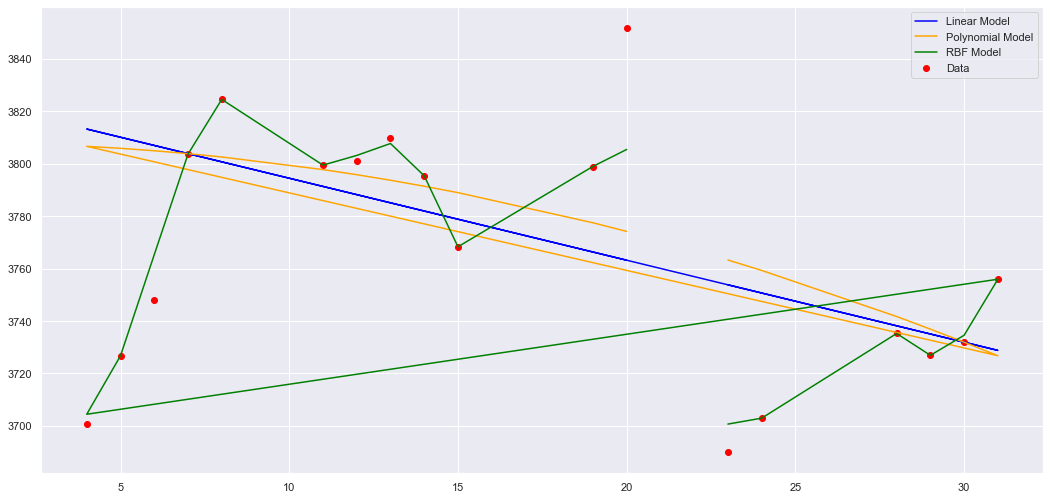

In [49]:

# plotter les modèles en un graph pour savoir qui a le meilleur entrainement pour la donnée originale 
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='red', label='Data')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.plot(days, pol_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.legend()
plt.show()



In [50]:


# Afficher les prix prédits pour un jour donné 
day =[[19]]
print('Prédiction avec un SVR Linéaire :', lin_svr.predict(day) )
print('Prédiction avec un SVR Polynomial :', pol_svr.predict(day) )
print('Prédiction avec un SVR RBF :', rbf_svr.predict(day) )


Prédiction avec un SVR Linéaire : [3766.35090857]
Prédiction avec un SVR Polynomial : [3777.51148865]
Prédiction avec un SVR RBF : [3799.01021313]


In [53]:

# Calcul d'erreur

from sklearn.model_selection import train_test_split
# Split data
X = days
y = df_adj_close
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred = rbf_svr.predict(X_test)
y_pred

array([3704.44920504, 3726.93965099, 3807.75733411, 3735.26021879,
       3795.44001558])

In [56]:
import math  
from sklearn.metrics import mean_squared_error

In [57]:
print(math.sqrt(mean_squared_error(y_test, y_pred)/100))

0.19392074391588432
